<a href="https://colab.research.google.com/github/Vamshi-Nallaguntla/DCNNs/blob/main/DCNN_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  # Importing the google drive module, I saved the dataset in my google drive
#mounting drive to the colab environment to access the files in the drive
#Google drive will be mounted at '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The dataset is in .rar format, so i am installing 'unrar' utility to extract files from the .rar dataset
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# I am giving the path to my dataset location on my google drive to 'unrar' utility
# It extracts the contents and place them in /content/ directory
!unrar x -y /content/drive/MyDrive/DATASET/15-Scene_Image_Dataset.rar /content/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/DATASET/15-Scene_Image_Dataset.rar

Creating    /content/15-Scene                                         OK
Creating    /content/15-Scene/00                                      OK
Extracting  /content/15-Scene/00/1.jpg                                     0%  OK 
Extracting  /content/15-Scene/00/10.jpg                                    0%  OK 
Extracting  /content/15-Scene/00/100.jpg                                   0%  OK 
Extracting  /content/15-Scene/00/101.jpg                                   0%  OK 
Extracting  /content/15-Scene/00/102.jpg                                   0%  OK 
Extracting  /content/15-Scene/00/103.jpg                                   0%  OK 
Extracting  /content/15-Scene/00/104.jpg                                   0%  OK 
Extracting  /content/15-Scene/00/105.jpg                   

In [ ]:
import os #to get functions to perform on the operationg system, I am importing 'os'

# I am defining the path to the dataset
dataset_path = '/content/15-Scene'

# Empty dictionary that stores images count for each class, to figure out the distribution of images across classes
class_counter = {}

# Using for loop, Loop through each class directory in the dataset
for class_name in os.listdir(dataset_path):                 # List all directories in the dataset path
    class_path = os.path.join(dataset_path, class_name)     # Join the path with the class name
    if os.path.isdir(class_path):                           # Ensure if it's a directory (in the current path)
        class_counter[class_name] = os.listdir(class_path)    # List images and store them in the directory

In [ ]:
# To get the class names and the number of images in that class
for label in class_counter:                                        # In the 'class_counter' iterate over each label
    print(f'Class: {label}, Count: {len(class_counter[label])}')   # Give the name of the class and a count of no. of images in that class


Class: 13, Count: 215
Class: 09, Count: 374
Class: 08, Count: 308
Class: 04, Count: 289
Class: 11, Count: 292
Class: 02, Count: 311
Class: 12, Count: 356
Class: 05, Count: 360
Class: 01, Count: 241
Class: 03, Count: 210
Class: 10, Count: 410
Class: 00, Count: 216
Class: 14, Count: 315
Class: 06, Count: 328
Class: 07, Count: 260


In [ ]:
#This block of code is for class-wise balance. I am using upsampling for this
from sklearn.utils import resample  # importing resample to perform upsampling
import numpy as np

# To upsample, we have to find the maximum count of images across classes (class '10' with 410 images)
max_count = max([len(images) for images in class_counter.values()])

# So all the other classes with less images are upsampled to get class-wise balance
for label, images in class_counter.items():
    if len(images) < max_count:  # If the class has less images than the maximum count then we will do upsampling to those classes
        # To match the maximum class size, Randomly resample with replacement
        upsampled_images = resample(images, replace=True, n_samples=max_count, random_state=42)
        class_counter[label] = upsampled_images #original list is replaced with the new upsampled list
    print(f'After balancing: Class {label}, Count {len(class_counter[label])}')  #print the updated class name and image count in that class

After balancing: Class 13, Count 410
After balancing: Class 09, Count 410
After balancing: Class 08, Count 410
After balancing: Class 04, Count 410
After balancing: Class 11, Count 410
After balancing: Class 02, Count 410
After balancing: Class 12, Count 410
After balancing: Class 05, Count 410
After balancing: Class 01, Count 410
After balancing: Class 03, Count 410
After balancing: Class 10, Count 410
After balancing: Class 00, Count 410
After balancing: Class 14, Count 410
After balancing: Class 06, Count 410
After balancing: Class 07, Count 410


In [ ]:
from sklearn.model_selection import train_test_split  #function to split data into training set, validation set and test test
import os                                             #Import os to handle file and directory paths
import numpy as np

# Dataset Path
dataset_path = '/content/15-Scene'

# Additional precaution to check valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

train_data = []   # List to store the training images
val_data = []     # List to tore Validation data
test_data = []    # List to store the test images
train_labels = [] # List to store training labels
val_labels = []   # List to store validation labels
test_labels = []  # List to store the test labels

# Loop through each class directory in the dataset
for class_name in os.listdir(dataset_path):  # List all directories in the dataset path
    # Check if it's a directory (in the current path)
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # List images with valid extensions
        images = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]

        # To follow the split requirement given
        # To split into 80% training set and 20% test set
        X_train, X_test, y_train, y_test = train_test_split(images, [class_name] * len(images), test_size=0.2, random_state=42)

        # From Training set, to further split 10% to create validation set
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) # 10% of the training set is validation set

        # Append to respective datasets
        train_data.extend(X_train)      # training images are added to the 'train_data' list
        val_data.extend(X_val)          # validation images are added to the 'val_data' list
        test_data.extend(X_test)        # test images are added to the 'test_data' list
        train_labels.extend(y_train)    # training labels are added to the 'train_labels' list
        val_labels.extend(y_val)        # validation labels are added to the 'val_labels' list
        test_labels.extend(y_test)      # test labels are added to the 'test_labels' list

# To get the size of each set
print(f'Training Set Size: {len(train_data)}')  # Training set
print(f'Validation Set Size: {len(val_data)}')  # Validation set
print(f'Test Set Size: {len(test_data)}')       # Test set


Training Set Size: 3217
Validation Set Size: 366
Test Set Size: 902


In [ ]:
import shutil         # to copy files from one directory to another directory
import os             # to handle directory anf file paths

# Directories for Train, Validation, Test
output_base_path = '/content/15-Scene-Split' # split dataset stored location

# Create directories for Train, Validation, and Test sets
for split in ['Train', 'Validation', 'Test']:
    for class_dir in os.listdir(dataset_path): # Iterate through each class
        # Create the corresponding directory for each class within Train, Validation, and Test folders
        os.makedirs(os.path.join(output_base_path, split, class_dir), exist_ok=True) #directory is created if it doesn't exist already

# Copy the images to their respective directories
for img, label in zip(train_data, train_labels):
    shutil.copy(os.path.join(dataset_path, label, img), os.path.join(output_base_path, 'Train', label)) # copy from original location to newly created 'Train' directory

for img, label in zip(val_data, val_labels):
    # copy from original location to newly created 'Validation' directory
    shutil.copy(os.path.join(dataset_path, label, img), os.path.join(output_base_path, 'Validation', label))

for img, label in zip(test_data, test_labels):
    # copy from original location to newly created 'Test' directory
    shutil.copy(os.path.join(dataset_path, label, img), os.path.join(output_base_path, 'Test', label))

#print a confirm message if copying is done
print("Images copied to Train, Validation, and Test directories.")

Images copied to Train, Validation, and Test directories.


In [ ]:
# import ImageDataGenerator before using it
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Rescale the pixel values
    horizontal_flip=True,          # Augment by flipping images horizontally
    rotation_range=20,             # Randomly rotate images
    zoom_range=0.2,                # Randomly zoom into images
    width_shift_range=0.1,         # Randomly shift images horizontally
    height_shift_range=0.1,         # Randomly shift images vertically
    brightness_range=[0.8, 1.2],  # Adjust brightness randomly
    fill_mode='nearest'
)

# No augmentation for validation and test, only rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    '/content/15-Scene-Split/Train',   # Path to the training data
    target_size=(150, 150),            # Resize images to 150x150
    batch_size=32,                     # Batch size
    class_mode='categorical',          # Multiclass classification
    shuffle=True                       # Shuffle the data
)

# Create the validation generator
validation_generator = val_test_datagen.flow_from_directory(
    '/content/15-Scene-Split/Validation',  # Path to the validation data
    target_size=(150, 150),                # Resize images to 150x150
    batch_size=32,                         # Batch size
    class_mode='categorical',              # Multiclass classification
    shuffle=True                           # Shuffle the validation data
)

# Create the test generator
test_generator = val_test_datagen.flow_from_directory(
    '/content/15-Scene-Split/Test',    # Path to the test data
    target_size=(150, 150),            # Resize images to 150x150
    batch_size=32,                     # Batch size
    class_mode='categorical',          # Multiclass classification
    shuffle=False                      # No need to shuffle the test data
)


Found 3217 images belonging to 15 classes.
Found 366 images belonging to 15 classes.
Found 902 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential                          # Sequential is to get linear stack of layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization #All Layers needed
from tensorflow.keras.optimizers import SGD, Adam, RMSprop              # The three optimizers we are testing on
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # callbacks for early stopping and check point
from tensorflow.keras.preprocessing.image import ImageDataGenerator       # to perform data augmentation
from tensorflow.keras.regularizers import l2
import time       # to track time spent
import warnings   #to handle warnings

# Function to create the model, now named myModel
def myModel(initializer='he_normal'): # defining the function to create a CNN with he normalization as initializer
    model = Sequential()              # stack layers

    # Input layer
    model.add(Input(shape=(150, 150, 3)))  # 150x150 image size with 3 color channels (RGB)

    # First Convolutional Block
    model.add(Conv2D(64, (3, 3), kernel_initializer=initializer, activation='elu')) #Conv layer 1 with 64 filters, 3x3
    model.add(BatchNormalization())                         # to normalize the activations and training stabilization
    model.add(MaxPooling2D(pool_size=(2, 2)))               #used to reduced spatial dimensions
    model.add(Dropout(0.3))                                 #regularization to prevent overfitting

    # Second Convolutional Block
    model.add(Conv2D(128, (3, 3), kernel_initializer=initializer, activation='elu')) #Conv layer 2 with 128 filters, 3x3
    model.add(BatchNormalization())                         # to normalize the activations and training stabilization
    model.add(MaxPooling2D(pool_size=(2, 2)))               #used to reduced spatial dimensions
    model.add(Dropout(0.4))                                 #regularization to prevent overfitting. drops at the rate of 40% in deeper layers

    # Third Convolutional Block
    model.add(Conv2D(256, (5, 5), kernel_initializer=initializer, activation='elu')) #Conv layer 3 with 256 filters, 5x5
    model.add(BatchNormalization())                        # to normalize the activations and training stabilization
    model.add(MaxPooling2D(pool_size=(2, 2)))              #used to reduced spatial dimensions
    model.add(Dropout(0.5))                                #regularization to prevent overfitting, drops at the rate of 50%

    # Fourth Convolutional Block (New Block)
    model.add(Conv2D(512, (5, 5), kernel_initializer=initializer, activation='elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Fully Connected Layers
    model.add(Flatten())                                   #3D output from the convolutional layers to a 1D vector used in fully connected layers
    model.add(Dense(512, kernel_regularizer=l2(0.001), activation='elu')) #Fully connected Dense layer with 512 units
    model.add(Dropout(0.5))                                #regularization to prevent overfitting, drops at the rate of 50%

    # Output Layer
    model.add(Dense(15, activation='softmax'))             # 15 classes for the 15-scene dataset
    warnings.filterwarnings("ignore")                      # Ignore warnings during training
    return model

In [ ]:
from tensorflow.keras.callbacks import Callback  # Callback to track training time for each epoch
import time

# Callback to track training time for each epoch
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.epoch_times = []  # List to store the time for each epoch

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()  # Starting time for each epoch

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_time_start  # Time taken for the epoch
        self.epoch_times.append(epoch_time)  # Append the epoch time to the list


In [ ]:
def eval_optimizer(optimizer_name, train_generator, validation_generator, test_generator):  # Function to evaluate the optimizer
    if optimizer_name == 'SGD':                                                             # when SGD is optimizer
        optimizer = SGD(learning_rate=0.001, momentum=0.9)
    elif optimizer_name == 'Adam':                                                          # when Adam is optimizer
        optimizer = Adam(learning_rate=0.001)
    elif optimizer_name == 'RMSProp':                                                       # when RMSprop is optimizer
        optimizer = RMSprop(learning_rate=0.001)

    model = myModel()  # Create the myModel function

    # Compile the model with the selected optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Instantiate the TimeHistory callback to track epoch times required to plot graphs
    time_callback = TimeHistory()

    # Callbacks for saving the best model
    callbacks = [
        ModelCheckpoint(f'best_model_{optimizer_name}.keras', save_best_only=True),
        time_callback                                               # Add the TimeHistory callback
    ]

    start_time = time.time()                                        # Start time for training

    history = model.fit(
        train_generator,
        epochs=150,                                                   # Number of epochs model is trained on
        validation_data=validation_generator,
        callbacks=callbacks
    )

    training_time = time.time() - start_time                         # overall time took to train the model

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Return the information we need, they are history, test metrics, training time, and epoch times
    return history, test_loss, test_accuracy, training_time, time_callback.epoch_times


In [ ]:
import time
from threading import Thread               # to run tasks in thr background using threading

# Function to keep the session alive silently, because always google colab say runtime timeout and stop training when colab is inactive
def keep_alive():
    while True:
        time.sleep(60)  # Sleep for 60 seconds to keep the session alive

# Start the keep-alive task in the background
t = Thread(target=keep_alive)
t.daemon = True                            # Ensures the thread exits when the main program ends
t.start()

optimizers = ['SGD', 'Adam', 'RMSProp']    # List of the three optimizers to test
history_logs = {}                          # empty dict to store training and evaluation history for the optimizers

for opt in optimizers:
    print(f"\nTraining started with optimizer: {opt}\n")  # Print a message indicating training started using which optimizer

    # Run the training with the current optimizer and get epoch times
    history, test_loss, test_accuracy, training_time, epoch_times = eval_optimizer(
        opt, train_generator, validation_generator, test_generator
    )

    # Store the logs for graph generation
    history_logs[opt] = {                # An entry for the current optimizer is to be created in the history_logs dict
        'history': history,              # Store training history
        'test_loss': test_loss,          # Store test loss
        'test_accuracy': test_accuracy,  # Store test accuracy
        'training_time': training_time,  # Store training time : Time taken to train the model with the optimizer
        'epoch_times': epoch_times       # Store the epoch times : Time taken to allow plotting and comparision
    }

    print(f"\nTraining completed with optimizer: {opt}\n")  # Print a message indicating training completed using which optimizer



Training started with optimizer: SGD

Epoch 1/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.1124 - loss: 6.1597 - val_accuracy: 0.1421 - val_loss: 9.0553
Epoch 2/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.1916 - loss: 3.8991 - val_accuracy: 0.1803 - val_loss: 12.6719
Epoch 3/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.2192 - loss: 3.7387 - val_accuracy: 0.1694 - val_loss: 13.4887
Epoch 4/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.2612 - loss: 3.4655 - val_accuracy: 0.1257 - val_loss: 17.9958
Epoch 5/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.2857 - loss: 3.4292 - val_accuracy: 0.1421 - val_loss: 19.8760
Epoch 6/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.3086 - loss: 3.2646 - val_accuracy: 0.1421 - val_loss: 22.0129
Epoch 7/150
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.3209 - loss: 3.1647 - val_accuracy: 0.1448 - val_loss: 15.7228
Epoch 8/150
101/101 ━━━━━━━━━━━

In [ ]:
# Function to display comparison results with computation time
def optimizer_comparison_results(history_logs):
    # Print the column names in the header using string formatting
    print("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
        'Optimizer', 'Training Loss', 'Validation Loss', 'Training Acc', 'Validation Acc', 'Comp Time (s)')
    )
    print("="*92)  # Seperator line for better readability

    for opt in history_logs:
        try:
            training_loss = history_logs[opt]['history'].history['loss'][-1]  # Last training loss for the current optimizer
            validation_loss = history_logs[opt]['history'].history['val_loss'][-1]  # Last validation loss for the current optimizer
            training_acc = history_logs[opt]['history'].history['accuracy'][-1]  # Last training accuracy for the current optimizer
            validation_acc = history_logs[opt]['history'].history['val_accuracy'][-1]  # Last validation accuracy for the current optimizer
            computation_time = history_logs[opt]['training_time']  # Total training time in seconds

            # Print out the comparison for each optimizer for various metrics
            print("{:<15} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.2f}".format( # Format the output to display 4 decimal places for losses and accuracies and 2 decimal places for comp times
                opt, training_loss, validation_loss, training_acc, validation_acc, computation_time)
            )

        # To handle exception for KeyError
        except KeyError as e:
            print(f"Error retrieving values for optimizer {opt}: {e}") # Print an error message if data is missing for any optimizer


In [ ]:
# Calling the function to display the comparison results with different optimizers
optimizer_comparison_results(history_logs)

Optimizer       Training Loss   Validation Loss Training Acc    Validation Acc  Comp Time (s)  
SGD             1.3024          4.0973          0.7756          0.5601          3134.04        
Adam            1.7253          2.3024          0.8614          0.7268          3130.06        
RMSProp         1.0612          1.6853          0.8679          0.7377          3135.95        


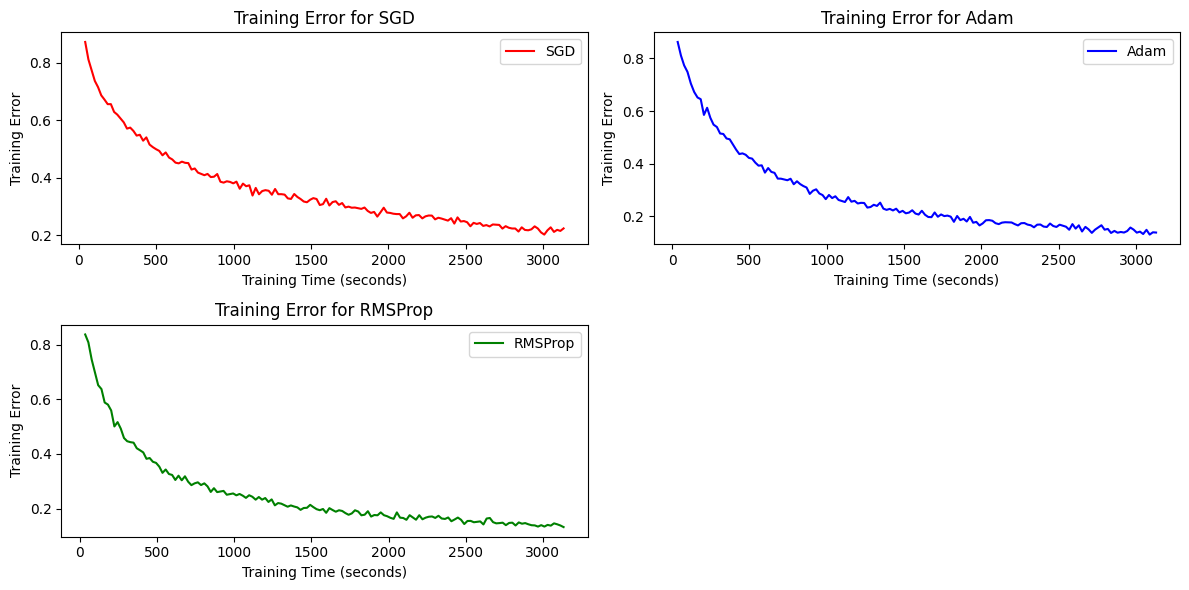

In [ ]:
import matplotlib.pyplot as plt # import matplotlib to create plots
import numpy as np              # to perform numerical operations, especially on arrays

# Graph-1: Training time (x-axis) vs Training error(y-axis)
def graph_1(history_logs):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Create 2x2 subplots with the specified figure size, 'axs' is an array of subplots (2 rows, 2 columns)
    axs = axs.flatten()  # Flatten for easier indexing. 2x2 array of subplots to 1D array

    # Define the colors for each optimizer
    optimizer_colors = {
        'SGD': 'red',          # Red for SGD optimizer
        'Adam': 'blue',        # Blue for Adam optimizer
        'RMSProp': 'green'     # Green for RMSProp optimizer
    }

    for i, opt in enumerate(history_logs):   # loop through each optimizer's history
        history = history_logs[opt]['history']                   # Get training history for the current optimizer
        training_accuracy = history.history['accuracy']          # Extract training accuracy
        training_error = [1 - acc for acc in training_accuracy]  # Calculate training error

        # Cumulative training time over epochs
        cumulative_time = np.cumsum(history_logs[opt]['epoch_times']) # used to get total training time at each epoch

        # Plot training error vs training time
        axs[i].plot(cumulative_time, training_error, label=f'{opt}', color=optimizer_colors[opt])
        axs[i].set_title(f'Training Error for {opt}')                 # Set title of the subplot
        axs[i].set_xlabel('Training Time (seconds)')                  # Set Training time as x-label
        axs[i].set_ylabel('Training Error')                           # Set Training error as y-label
        axs[i].legend()                                               # Display a legend indicating the optimizer used

    # Turn off the last unused subplot
    axs[-1].axis('off')  # Hide the 4th unused subplot

    # Automatically adjust the layout to prevent overlapping elements
    plt.tight_layout() # To fit subplots adjust the layout
    plt.show()         # Display the subplots with the figure

# Call the function to plot Training Error vs Training Time for each optimizer in subplots
graph_1(history_logs)


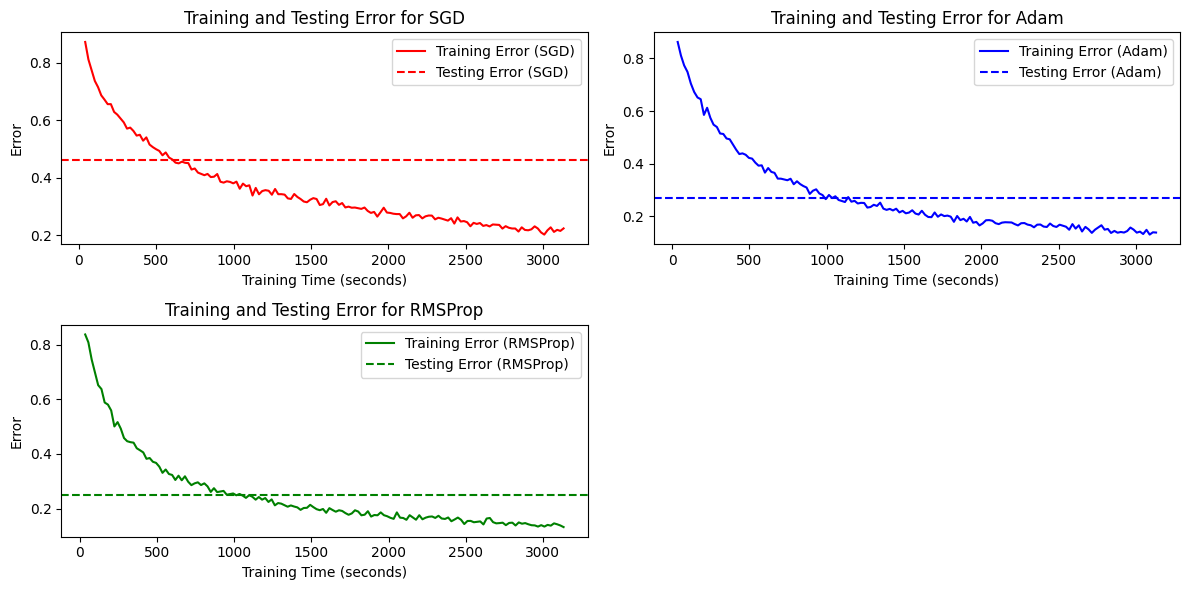

In [ ]:
# Graph-2: Training time(x-axis) vs Errors (Training error and Testing error)(y-axis)

def graph_2(history_logs):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # fig is the figure object
    axs = axs.flatten()  # Flatten for easier indexing

    # Define the colors for each optimizer
    optimizer_colors = {
        'SGD': 'red',             # Red for SGD optimizer
        'Adam': 'blue',           # Blue for Adam optimizer
        'RMSProp': 'green'        # Green for RMSProp optimizer
    }

    for i, opt in enumerate(history_logs):  # Loop through each optimizer's history
        history = history_logs[opt]['history']  # Get training history for the current optimizer
        training_accuracy = history.history['accuracy']
        training_error = [1 - acc for acc in training_accuracy]  # Training error

        testing_error = 1 - history_logs[opt]['test_accuracy']  # Testing error

        # Cumulative training time over epochs
        cumulative_time = np.cumsum(history_logs[opt]['epoch_times'])

        # Plot training error and testing error on the current subplot with specific color
        axs[i].plot(cumulative_time, training_error, label=f'Training Error ({opt})', color=optimizer_colors[opt])
        axs[i].axhline(y=testing_error, color=optimizer_colors[opt], linestyle='--', label=f'Testing Error ({opt})')
        axs[i].set_title(f'Training and Testing Error for {opt}')        # Set title of the subplot
        axs[i].set_xlabel('Training Time (seconds)')                     # Set x-label as Training time
        axs[i].set_ylabel('Error')                                       # Set y-label as Error
        axs[i].legend()                                                  # Display a legend using optimizer used

    # Turn off the last unused subplot
    axs[-1].axis('off')  # Hide the last 4th unused subplot

    plt.tight_layout() # Adjust layout to fit subplots within the figure area
    plt.show()         # Display the subplots with the figure

# Call the function to plot Training Error and Testing Error vs Training Time in subplots
graph_2(history_logs)


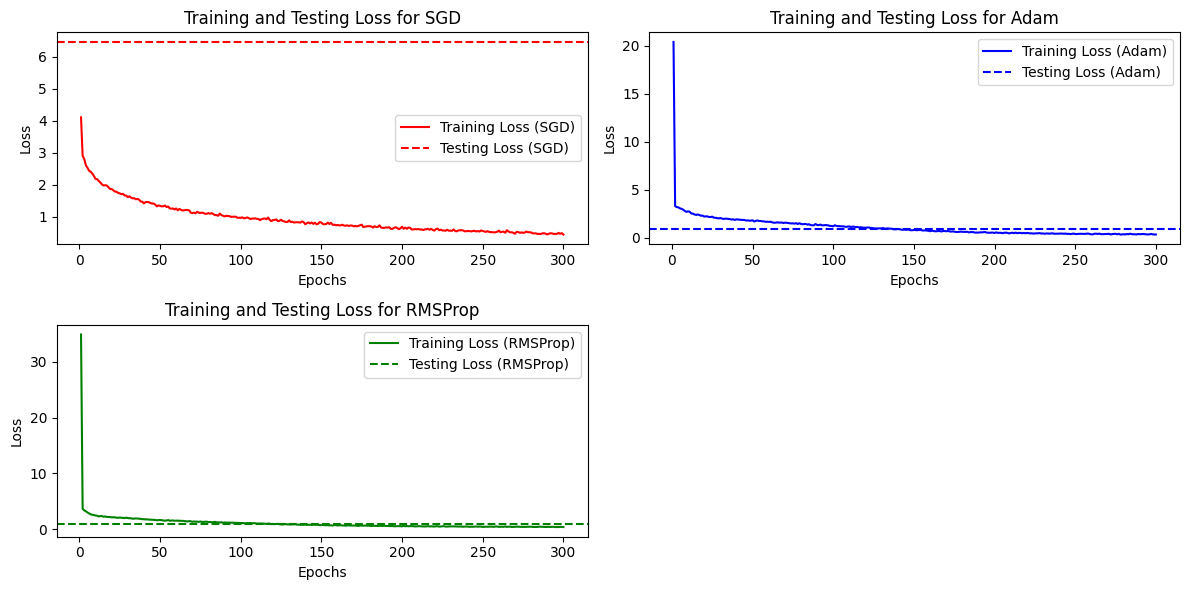

In [ ]:
# Graph-3: Number of epochs(x-axis) vs Loss(Training loss and Testing loss)(y-axis)

def graph_3(history_logs):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Create 2x2 subplots
    axs = axs.flatten()  # Flatten for easier indexing

    # Define the colors for each optimizer
    optimizer_colors = {
        'SGD': 'red',              # Red for SGD optimizer
        'Adam': 'blue',            # Blue for Adam optimizer
        'RMSProp': 'green'         # Green for RMSProp optimizer
    }

    for i, opt in enumerate(history_logs): # Loop through each optimizer's history
        history = history_logs[opt]['history']
        training_loss = history.history['loss']  # Training loss over epochs
        test_loss = history_logs[opt]['test_loss']  # Testing loss (constant for all epochs)

        epochs = range(1, len(training_loss) + 1)  # Number of epochs

        # Plot training loss and testing loss
        axs[i].plot(epochs, training_loss, label=f'Training Loss ({opt})', color=optimizer_colors[opt])
        axs[i].axhline(y=test_loss, color=optimizer_colors[opt], linestyle='--', label=f'Testing Loss ({opt})')
        axs[i].set_title(f'Training and Testing Loss for {opt}')   # set title
        axs[i].set_xlabel('Epochs')                                # set x-label
        axs[i].set_ylabel('Loss')                                  # set y-label
        axs[i].legend()                                            # Display a legend indicating the optimizer used

    # Turn off the last unused subplot
    axs[-1].axis('off')  # Hide the last unused subplot

    plt.tight_layout()   # Adjust layout to fit subplots within the figure area
    plt.show()           # Display the subplots with the figure

# Call the function to plot Training Loss and Testing Loss vs Number of Epochs in subplots
graph_3(history_logs)
